<a href="https://www.kaggle.com/code/mersaidylmaz/breast-cancer-full-analyst-and-predict?scriptVersionId=147059282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,r2_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

<div style="padding: 35px;color:white;margin:10;font-size:240%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Veri Setini İnceleme </span></b> </div>

In [2]:
cancer = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df = cancer.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# <span style="color:#E888BB; font-size: 1%;">1 | Keşifçi Veri Analizi </span>
<div style="padding: 35px;color:white;margin:10;font-size:160%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>1 | Keşifçi Veri Analizi </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Verisetinin Hakkında Ön Bilgi Alma</span></b> </div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Verisetinindeki Gereksiz Sütunlardan Kurtulma</span></b> </div>

In [4]:
df = df.drop(["Unnamed: 32" , "id" ] , axis =1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Verisetinindeki Sayısal Değerleri İnceleme</span></b> </div>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'>3. Verisetinindeki Benzersiz Değerler </span></b> </div>

In [7]:
# Her Sütundaki benzersiz değerleri bulma
for column in df.columns:
    distinct_values = len(df[column].unique())
    print(f"{column}: {distinct_values} distinct values")

diagnosis: 2 distinct values
radius_mean: 456 distinct values
texture_mean: 479 distinct values
perimeter_mean: 522 distinct values
area_mean: 539 distinct values
smoothness_mean: 474 distinct values
compactness_mean: 537 distinct values
concavity_mean: 537 distinct values
concave points_mean: 542 distinct values
symmetry_mean: 432 distinct values
fractal_dimension_mean: 499 distinct values
radius_se: 540 distinct values
texture_se: 519 distinct values
perimeter_se: 533 distinct values
area_se: 528 distinct values
smoothness_se: 547 distinct values
compactness_se: 541 distinct values
concavity_se: 533 distinct values
concave points_se: 507 distinct values
symmetry_se: 498 distinct values
fractal_dimension_se: 545 distinct values
radius_worst: 457 distinct values
texture_worst: 511 distinct values
perimeter_worst: 514 distinct values
area_worst: 544 distinct values
smoothness_worst: 411 distinct values
compactness_worst: 529 distinct values
concavity_worst: 539 distinct values
concave p

### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'>4. Eksik Gözlemlerin Analizi </span></b> </div>

In [8]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Değişkenlerin Veri Analizi Ve Görselleştirilmesi</span></b> </div>    

### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'>Tek Değişkenli Gözlem Analizi </span></b> </div>

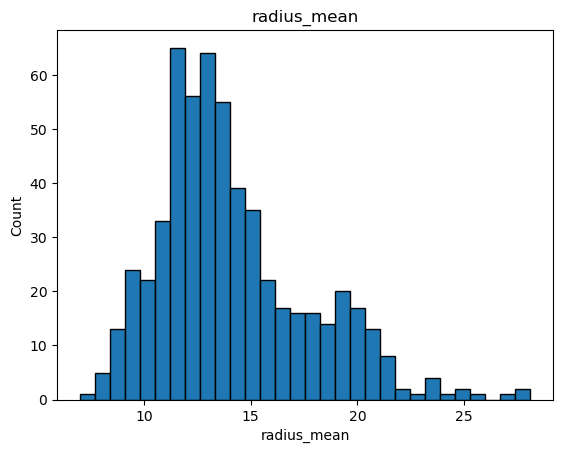

In [9]:
plt.hist(df['radius_mean'], bins=30, edgecolor='black')
plt.title('radius_mean')
plt.xlabel('radius_mean')
plt.ylabel('Count')
plt.show()

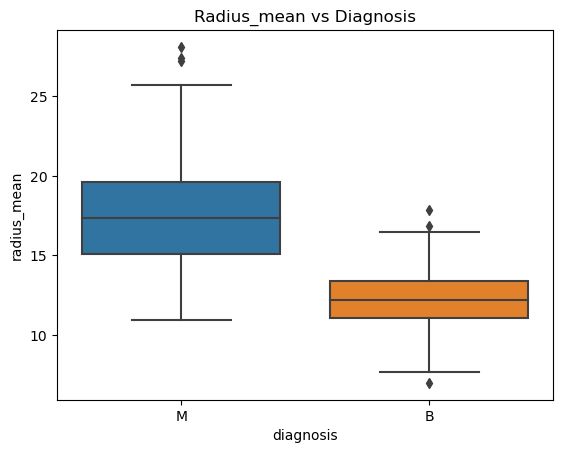

In [10]:
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.title('Radius_mean vs Diagnosis')
plt.show()

### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'>Çok Değişkenli Gözlem Analizi </span></b> </div>

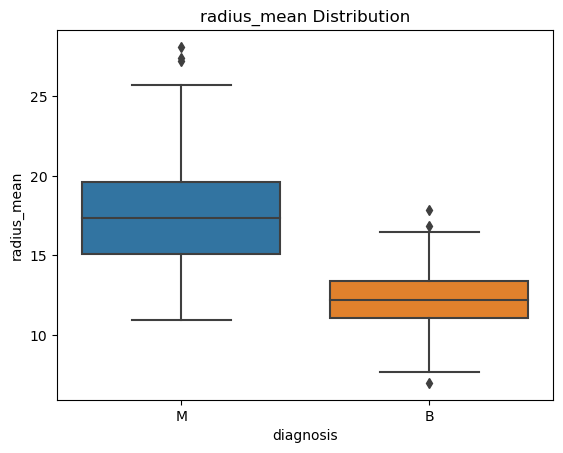

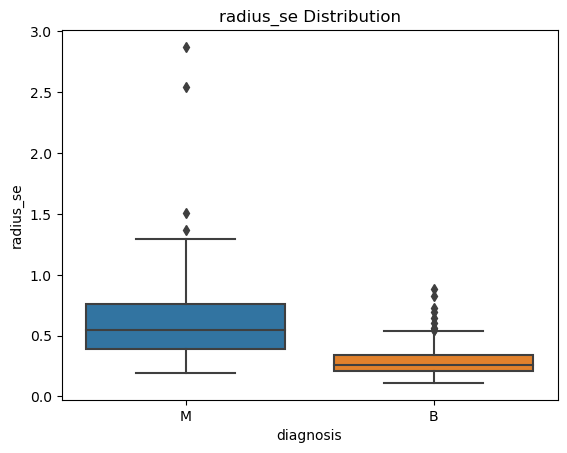

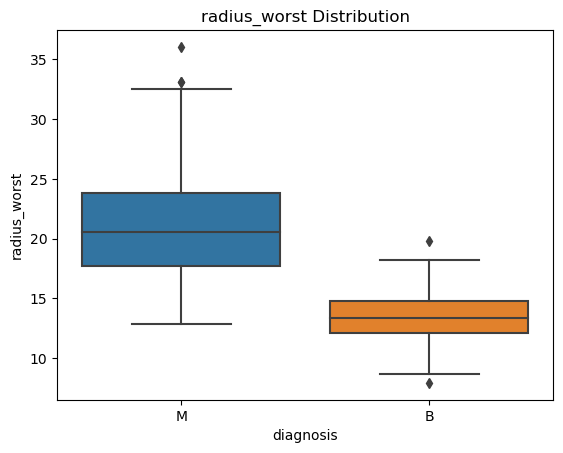

In [11]:
for column in ["radius_mean", 'radius_se' ,'radius_worst' ]:
    sns.boxplot(x = "diagnosis",y=column, data=df)
    plt.title(f'{column} Distribution')
    plt.show()

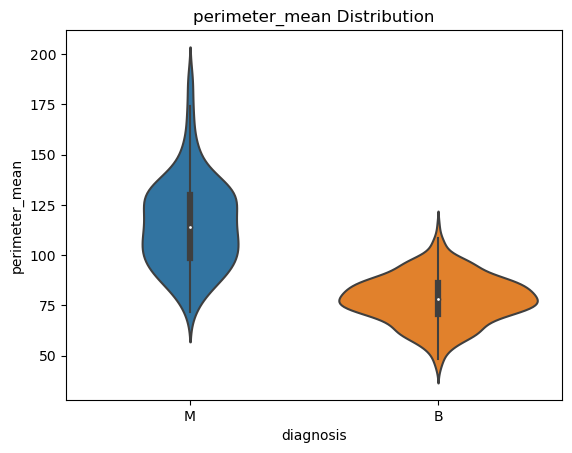

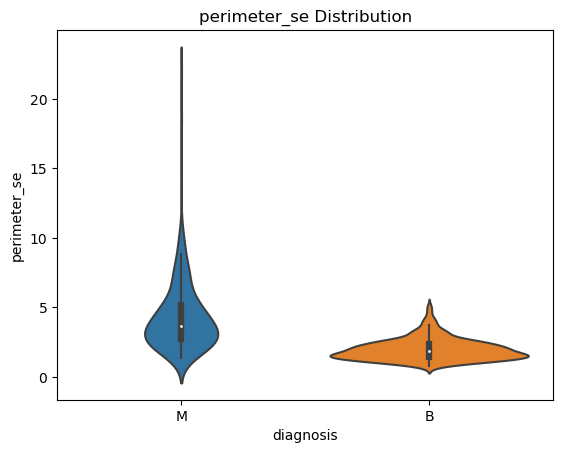

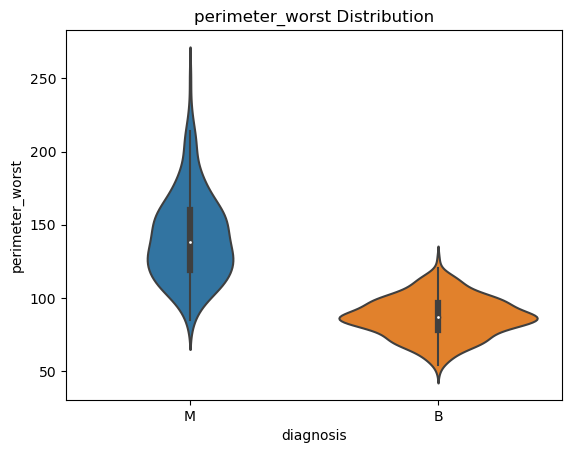

In [12]:
for column in ["perimeter_mean", 'perimeter_se' ,'perimeter_worst' ]:
    sns.violinplot(x = "diagnosis",y=column, data=df)
    plt.title(f'{column} Distribution')
    plt.show()

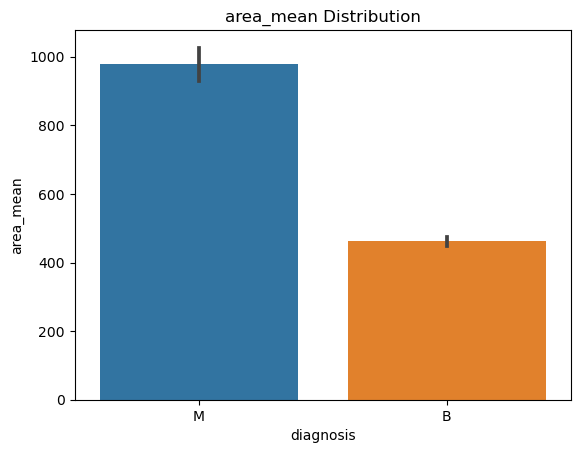

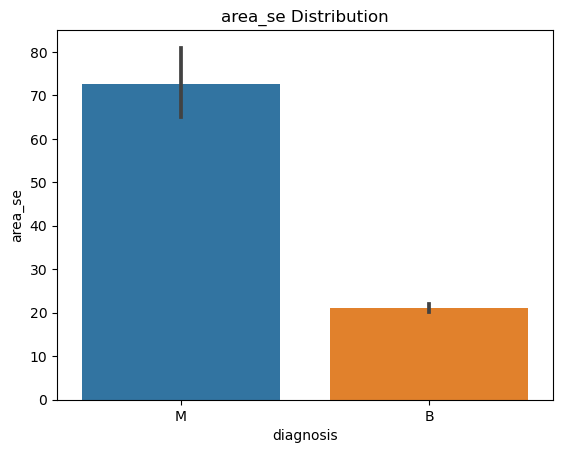

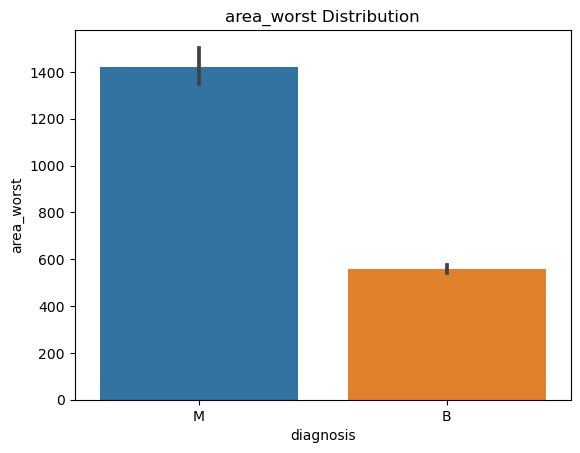

In [13]:
for column in ["area_mean", 'area_se' ,'area_worst' ]:
    sns.barplot(x = "diagnosis",y=column, data=df)
    plt.title(f'{column} Distribution')
    plt.show()

### <div style="padding: 15px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Korelsyon Matrisinin Heatmap İle Gösterimi </span></b> </div>

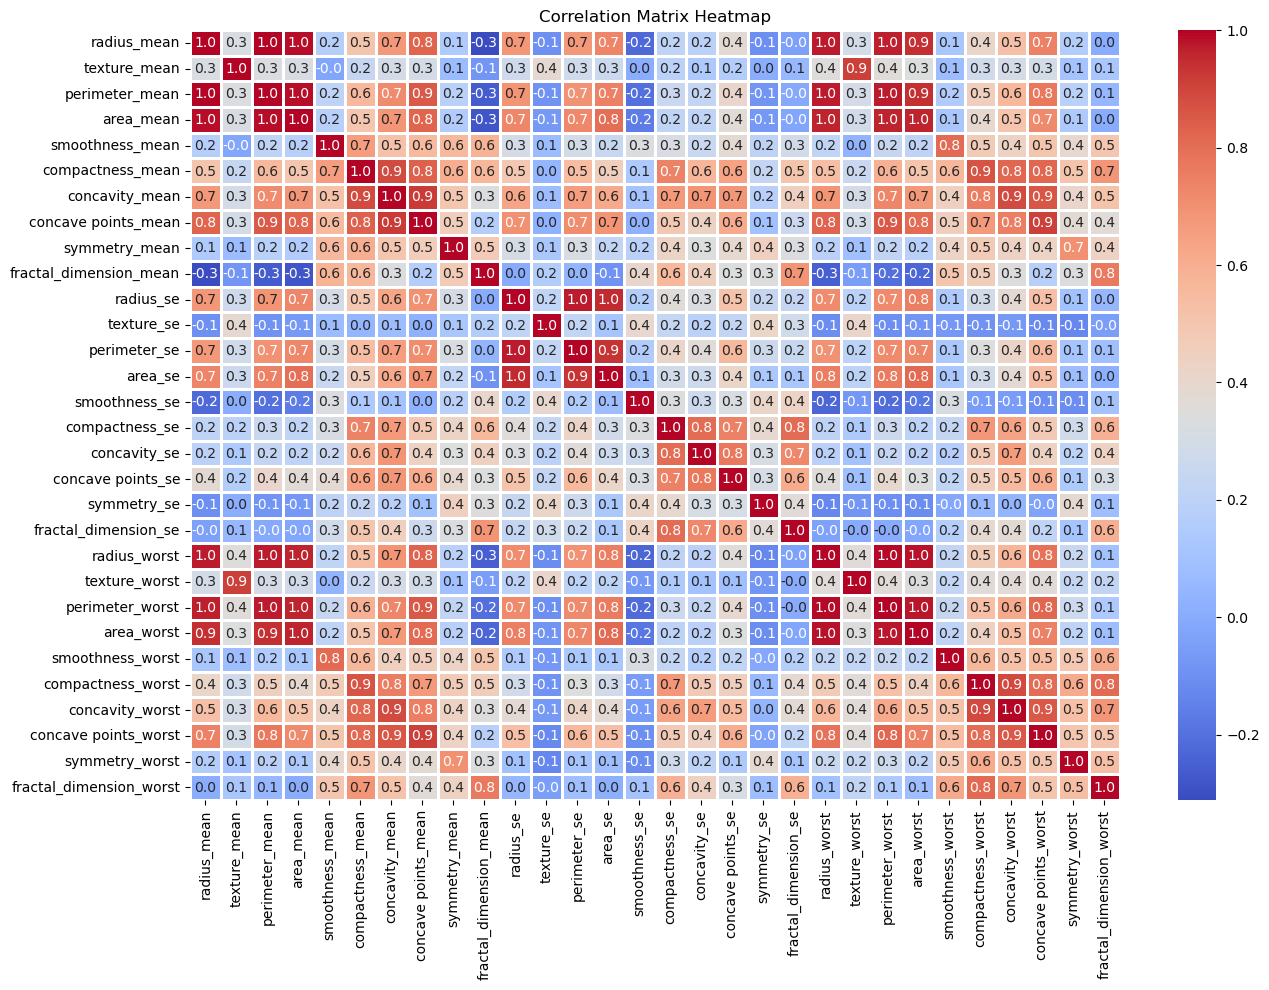

In [14]:
### Korelasyon Matrisi Çizilmesi
correlation_matrix = df.corr()
#Grafik 1.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.1f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()  

df["diagnosis"]= label_encoder.fit_transform(df["diagnosis"])
  
df["diagnosis"].unique()

array([1, 0])

In [16]:
X = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]
### Verinin Test ve Train olarak ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
## Random Forest İle Model Kurma Ve Tahmin İşlemi
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test) 
acc_rf = np.sqrt(accuracy_score(y_test , y_pred))
print("RandomForestClassifier Accuracy:", acc_rf)

RandomForestClassifier Accuracy: 0.9859147894356651


![](https://digitalpress.fra1.cdn.digitaloceanspaces.com/mhujhsj/2022/09/Internal-Nodes-crop-1.png)
​
<br>
​
> Bunlar tanımladığımız parametre ızgarası ve eldeki belirli veri kümesi göz önüne alındığında en uygun parametrelerdir. **farklı bir veri kümesi** veya **farklı bir parametre kılavuzu** için **optimal parametreler farklı olabilir**

In [18]:
## GBM İle Model Kurma Ve Tahmin İşlemi
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train , y_train)
y_pred_gbm = gbm_model.predict(X_test)
acc_gbm =  np.sqrt(accuracy_score(y_test , y_pred_gbm))
print("GradientBoostingClassifier Accuracy:" , acc_gbm)

GradientBoostingClassifier Accuracy: 0.9787961779869995


In [19]:
## XGBM İle Model Kurma Ve Tahmin İşlemi
from xgboost import XGBClassifier
xgbm_model = XGBClassifier().fit(X_train , y_train)
y_pred_xgbm = xgbm_model.predict(X_test)
acc_xgbm =  np.sqrt(accuracy_score(y_test , y_pred_xgbm))
print("XGBClassifier Accuracy:" , acc_xgbm)

XGBClassifier Accuracy: 0.9823619317924351


In [20]:
## LGBM İle Model Kurma Ve Tahmin İşlemi
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(X_train , y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
acc_lgbm =  np.sqrt(accuracy_score(y_test , y_pred_lgbm))
print("LGBMClassifier Accuracy:" , acc_lgbm)

LGBMClassifier Accuracy: 0.9752173865600178


In [21]:
## KNN İle Model Kurma İşlemi
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train , y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn =  np.sqrt(accuracy_score(y_test , y_pred_knn))
print("KNeighborsClassifier Accuracy:" , acc_knn)


KNeighborsClassifier Accuracy: 0.9823619317924351


In [22]:
models = pd.DataFrame({
    'Model': ['GBM ',
              'RF ', 'LGBM', 
            ' XGBM', 
              'KNN'],
    'Score': [acc_gbm, acc_rf 
              , acc_lgbm,  
              acc_xgbm,acc_knn ]})
models

,Model,Score
0,GBM,0.978796
1,RF,0.985915
2,LGBM,0.975217
3,XGBM,0.982362
4,KNN,0.982362


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Karışıklık Matrisi</span></b> </div>

Eğitilen model **test setinde** değerlendirilir. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Karışıklık matrisi</mark>**, modelin performansını görselleştirmek için kullanılır. Modelin gerçek pozitif, gerçek negatif, yanlış pozitif ve yanlış negatif tahminlerini gösterir.
<br>

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

#### **<span style='color:#16C2D5'> Precision:</span>**

Precision yani Kesinlik, gerçek pozitif tahminlerden kaçının gerçekte doğru olduğunun bir ölçüsüdür. Gerçek pozitiflerin (TP) sayısının gerçek pozitiflerin (TP) ve yanlış pozitiflerin (FP) toplamına bölümü olarak tanımlanır.

<p class="formul">
\[ Kesinlik = \frac{TP}{TP + FP} \]
</p>

#### **<span style='color:#16C2D5'>Recall:</span>**


Recall, Hatırlama (veya Duyarlılık), gerçek pozitif vakalardan kaçının doğru şekilde tanımlandığının bir ölçüsüdür. Gerçek pozitiflerin (TP) sayısının gerçek pozitiflerin (TP) ve yanlış negatiflerin (FN) toplamına bölümü olarak tanımlanır.

<br>

<p class="formul">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **<span style='color:#16C2D5'>F1-Score:</span>**


F1 puanı Kesinlik ve Geri Çağırmanın harmonik ortalamasıdır ve kesinlik ile geri çağırma arasındaki dengeyi bulmaya çalışır. Kesinlik ve geri çağırma çarpımının kesinlik ve geri çağırma toplamına bölünmesiyle elde edilen 2 kat olarak tanımlanır.

<br>

<p class="formul">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>

<br>
    
<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">     
    <b><span style='color:#16C2D5'>|</span> Tüm bu formüllerde: </b>
    

    
    Gerçek Pozitifler (TP), evet olarak tahmin ettiğimiz (diyabet mevcut) ve muhafaza de evet olan vakalardır.

    Gerçek Negatifler (TN) hayır tahmin ettiğimiz, gerçekte de hayır olan durumlardır.

    Yanlış Pozitifler (FP), evet olarak tahmin ettiğimiz ancak gerçekte hayır olduğu durumlardır.

    Yanlış Negatifler (FN), hayır tahmin ettiğimiz, ancak gerçekte evet olan durumlardır.

</div> 

Model Accuracy:  0.972027972027972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



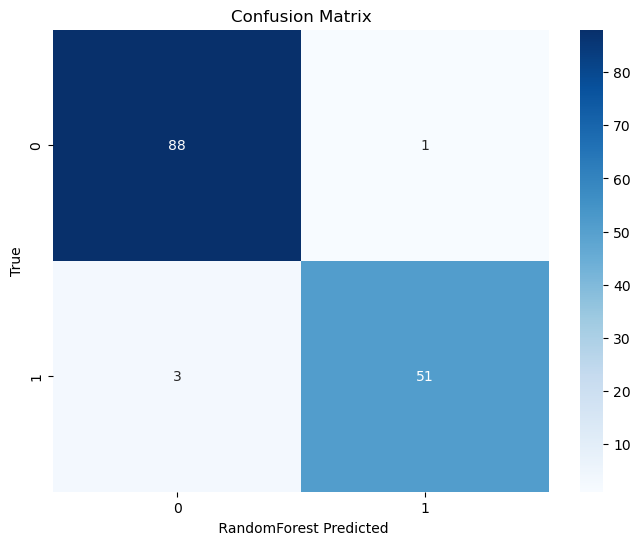

In [23]:
## Kurulan en iyi RandomForest modeli
y_pred_rf = rf_model.predict(X_test)

# Model doğruluk değeri
print("Model Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Plot ile Karışıklık Matrisinin çizilmesi
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel(' RandomForest Predicted')
plt.ylabel('True')
plt.show()

Model Accuracy:  0.958041958041958
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



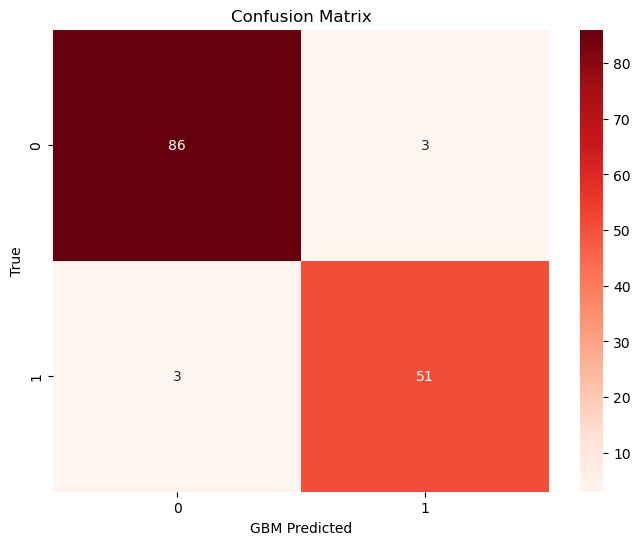

In [24]:
## Kurulan en iyi GBM modeli
y_pred_gbm = gbm_model.predict(X_test)

# Modelin Doğruluğu
print("Model Accuracy: ", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

# Plot ile Karışıklık Matrisinin çizilmesi
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('GBM Predicted')
plt.ylabel('True')
plt.show()

Model Accuracy:  0.965034965034965
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



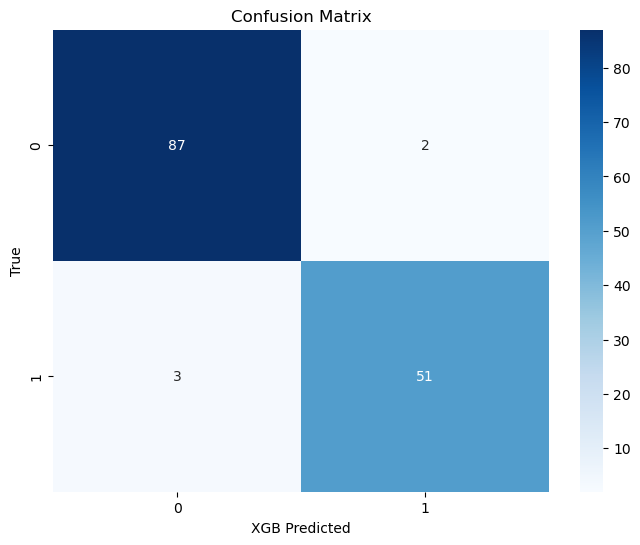

In [25]:
## Kurulan en iyi XGBM modeli
y_pred_xgbm = xgbm_model.predict(X_test)

# Modelin Doğruluğu
print("Model Accuracy: ", accuracy_score(y_test, y_pred_xgbm))
print(classification_report(y_test, y_pred_xgbm))

# Plot ile Karışıklık Matrisinin çizilmesi
cm = confusion_matrix(y_test, y_pred_xgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('XGB Predicted')
plt.ylabel('True')
plt.show()

Model Accuracy:  0.951048951048951
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



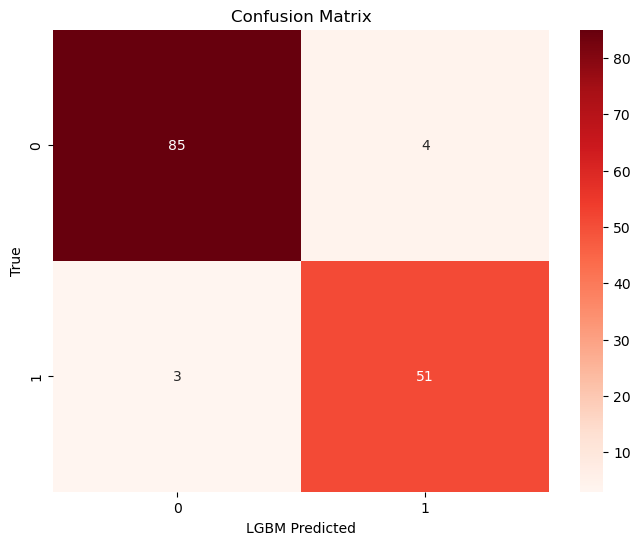

In [26]:
# Kurulan LGBM Modeli
y_pred_lgbm = lgbm_model.predict(X_test)

# Model Doğruluğu
print("Model Accuracy: ", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

# Plot ile Karışıklık Matrisinin çizilmesi
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('LGBM Predicted')
plt.ylabel('True')
plt.show()

Model Accuracy:  0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



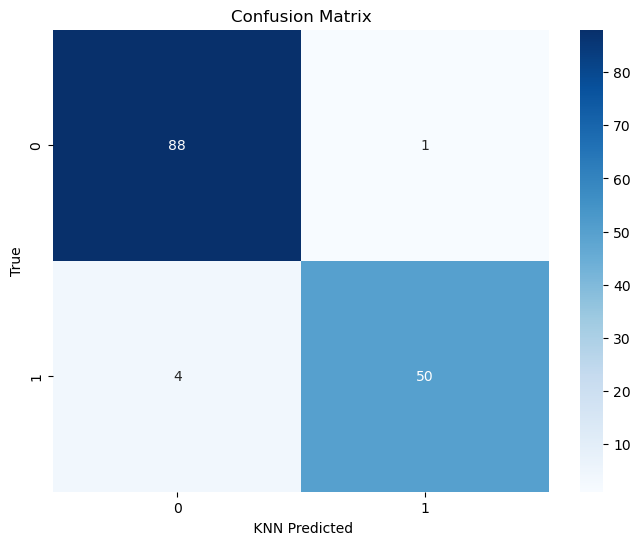

In [27]:
## Kurulan en iyi KNN modeli
y_pred_knn = knn_model.predict(X_test)

# Model doğruluk değeri
print("Model Accuracy: ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Plot ile Karışıklık Matrisinin çizilmesi
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel(' KNN Predicted')
plt.ylabel('True')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Değişken Önemi</span></b> </div>

Son olarak, her özelliğin önemi hesaplanır. Bu, topluluğun tüm ağaçları üzerinde ortalaması alınan düğüm safsızlığındaki toplam azalmadır (o düğüme ulaşan örneklerin oranı ile yaklaşık olarak bu düğüme ulaşma olasılığı ile ağırlıklandırılmıştır). **Özelliğin önemi, hangi özelliklerin tahmin yapmak için en yararlı olduğu konusunda fikir verir.** Özellikler önemlerine göre sıralanır ve bir çubuk grafik kullanılarak görselleştirilir.

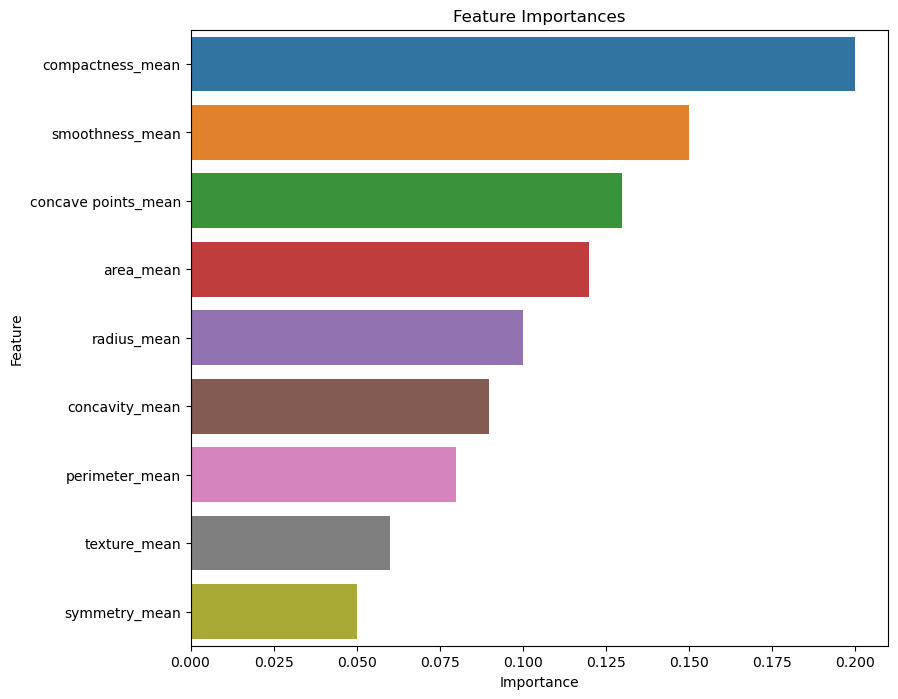

In [28]:
# Değişken adları
feature_names = ['radius_mean', 'perimeter_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']

# Özellik önemleri
importances = [0.1, 0.08, 0.06, 0.12, 0.15, 0.2, 0.09, 0.13, 0.05]  # Örnek önem değerleri

# Özellik önemleri için dataframe oluşturma
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Öneme göre dataframe'i sıralama
importance_df = importance_df.sort_values('Importance', ascending=False)

# Grafik çizdirme
plt.figure(figsize=(9, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Verilerin önem sıralamasına bakıldığı sonuçlarda etkili olan faktörler açıkça gözükmektedir. Bu durumda verideki sonuçları etkileyen en önemli faktör compactness_mean değeridir.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> TEŞEKKÜRLER </span></b> </div>